In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


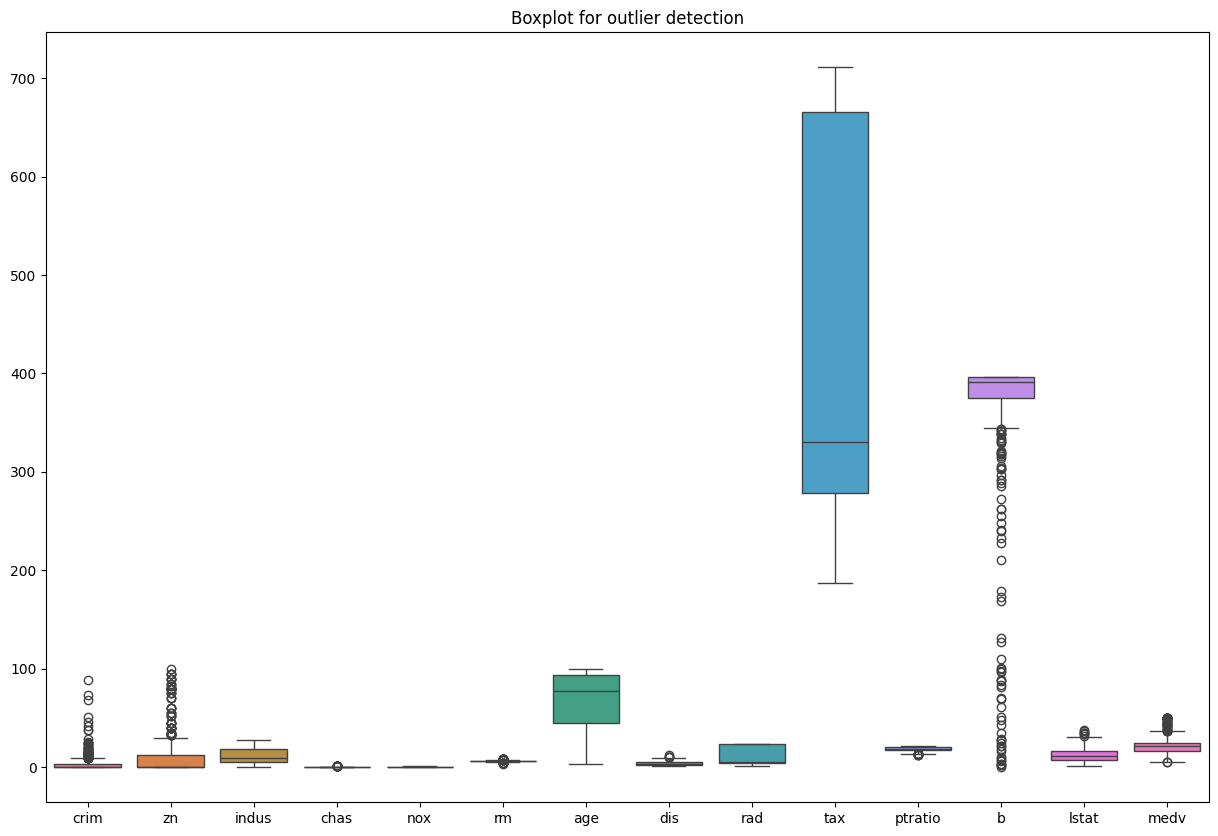

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title("Boxplot for outlier detection")
plt.show()

In [ ]:
# .sum()  hataya tha dalna h usko waps outlier mein
def detect_outlier_iqr(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    iqr = Q3-Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    # Compare only the values in the current column:
    outlier = ((data < lower_bound) | (data > upper_bound)).sum()
    print(outlier)
    return outlier

outliers = df.apply(detect_outlier_iqr)
outliers

66
68
0
35
0
30
0
5
0
0
15
77
7
40


,0
crim,66
zn,68
indus,0
chas,35
nox,0
rm,30
age,0
dis,5
rad,0
tax,0


In [ ]:
def detect_outlier_iqr(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    iqr = Q3-Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    return ((data < lower_bound) | (data > upper_bound))
    # Compare only the values in the current column:
    outlier = ((data < lower_bound) | (data > upper_bound))
    print(outlier)
    return outlier

outlier_mask=df.apply(detect_outlier_iqr)
outlier_mask

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Iterating   ##
for column in df.columns:
    median_value = df[column].median()
    df.loc[outlier_mask[column],column] = median_value


#Find where the outliers with median were replaced
outlier_indices=  np.where(outlier_mask)
outlier_indices


#Find where outliers were replaced
outlier_indices=  np.where(outlier_mask)
outlier_locations=list(zip(outlier_indices[1],outlier_indices[0]))
outlier_locations


# Continuing

(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  97,  98,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152,
        152, 153, 154, 154, 155, 155, 156, 157, 160, 160, 161, 162, 162,
        162, 163, 163, 163, 165, 166, 166, 167, 168, 169, 170, 179, 180,
        180, 182, 186, 186, 187, 188, 189, 190, 190, 191, 192, 193, 194,
        195, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        202, 203, 203, 203, 204, 204, 204, 208, 209, 210, 211, 212, 216,
        218, 219, 220, 221, 222, 224, 224, 225, 225, 226, 226, 228, 232,
        232, 233, 233, 234, 236, 253, 253, 254, 255, 256, 256, 257, 257,
        257, 258, 259, 260, 261, 261, 262, 262, 262, 263, 264, 265, 266,
        267, 267, 267, 268, 268, 269, 273, 274, 274, 275, 276, 276, 277,
        277, 278, 280, 280, 282, 282, 283, 283, 283, 283, 284, 285, 286,
        286, 287, 288, 289, 290, 291, 291, 292, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 331, 332, 341, 343